In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf
import statsmodels.api as sm
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ToyotaCorolla.csv to ToyotaCorolla.csv


In [5]:
data = pd.read_csv('ToyotaCorolla.csv', encoding= 'latin1')
data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 38 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Color             1436 non-null   object
 11  Automatic         1436 non-null   int64 
 12  cc                1436 non-null   int64 
 13  Doors             1436 non-null   int64 
 14  Cylinders         1436 non-null   int64 
 15  Gears             1436 non-null   int64 
 16  Quarterly_Tax     1436 non-null   int64 
 17  Weight        

In [7]:
data.describe()

,Id,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,HP,Met_Color,Automatic,cc,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,...,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000
mean,721.555014,10730.824513,55.947075,5.548747,1999.625348,68533.259749,101.502089,0.674791,0.055710,1576.85585,...,0.580084,0.561978,0.977716,0.146240,0.256964,0.300139,0.770195,0.204735,0.145543,0.277855
std,416.476890,3626.964585,18.599988,3.354085,1.540722,37506.448872,14.981080,0.468616,0.229441,424.38677,...,0.493717,0.496317,0.147657,0.353469,0.437111,0.458478,0.420854,0.403649,0.352770,0.448098
min,1.000000,4350.000000,1.000000,1.000000,1998.000000,1.000000,69.000000,0.000000,0.000000,1300.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,361.750000,8450.000000,44.000000,3.000000,1998.000000,43000.000000,90.000000,0.000000,0.000000,1400.00000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
50%,721.500000,9900.000000,61.000000,5.000000,1999.000000,63389.500000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
75%,1081.250000,11950.000000,70.000000,8.000000,2001.000000,87020.750000,110.000000,1.000000,0.000000,1600.00000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,1442.000000,32500.000000,80.000000,12.000000,2004.000000,243000.000000,192.000000,1.000000,1.000000,16000.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
data1 = data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
data1.head()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [10]:
data1 = data1.rename({'Age_08_04':'Age','Quarterly_Tax':'QT'},axis=1)
data1.head()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170


In [11]:
data1.shape

(1436, 9)

In [12]:
data1.corr()

,Price,Age,KM,HP,cc,Doors,Gears,QT,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
QT,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


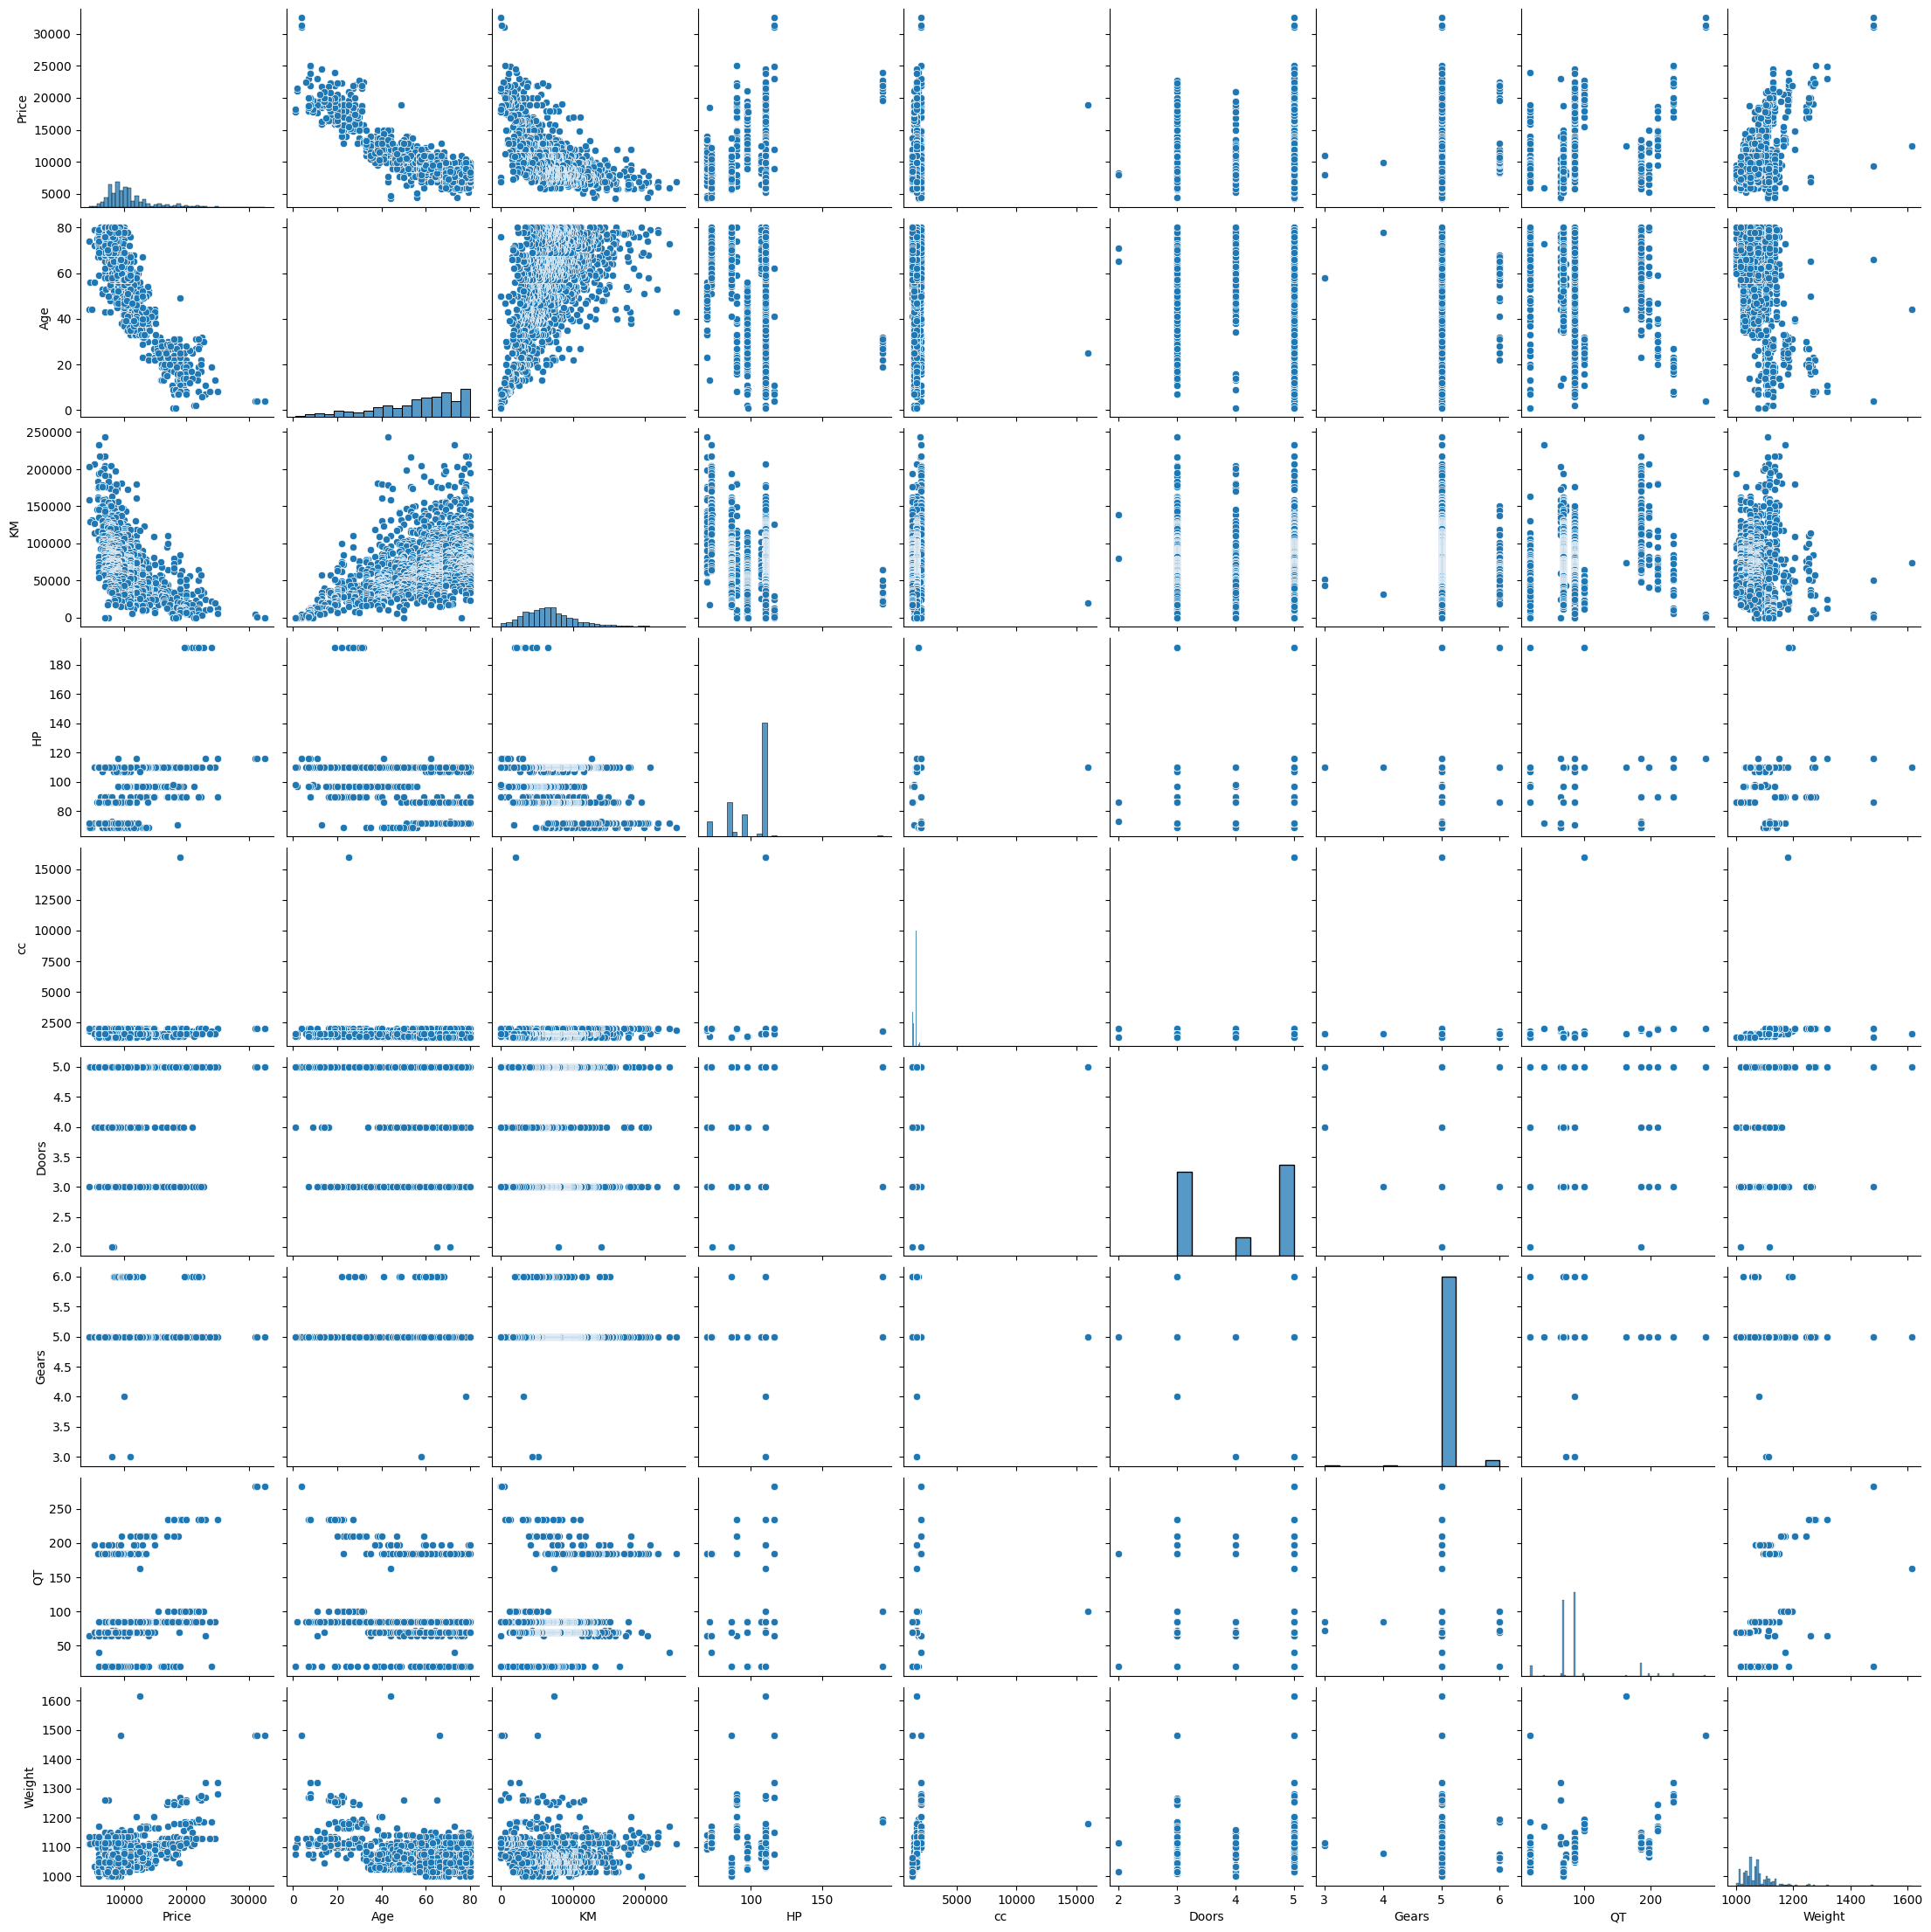

In [13]:
sns.pairplot(data1)

In [14]:
x = data1.iloc[:,1:]
x.head()

,Age,KM,HP,cc,Doors,Gears,QT,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170


In [16]:
y = data1.iloc[:,0]
y.head()

0    13500
1    13750
2    13950
3    14950
4    13750
Name: Price, dtype: int64

In [17]:
type(x)

pandas.core.frame.DataFrame

In [18]:
type(y)

pandas.core.series.Series

In [19]:
x.shape

(1436, 8)

In [20]:
y.shape

(1436,)

In [21]:
# Train and Test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2, random_state = 110)

In [22]:
x_train.head()

,Age,KM,HP,cc,Doors,Gears,QT,Weight
1175,80,94079,110,1600,5,5,85,1085
812,65,71317,110,1600,3,5,69,1050
297,40,41339,110,1600,5,5,85,1080
501,47,57500,110,1600,4,5,19,1105
642,68,119289,110,1600,4,5,69,1035


In [23]:
x_train.shape

(1148, 8)

In [24]:
x_test.head()

,Age,KM,HP,cc,Doors,Gears,QT,Weight
1008,62,37000,86,1300,3,5,69,1015
603,58,205000,72,2000,4,5,185,1100
1231,76,83405,110,1600,5,5,85,1070
352,38,26262,110,1600,5,5,85,1075
628,64,132393,72,2000,5,5,185,1135


In [25]:
x_test.shape

(288, 8)

In [26]:
y_train.head()

1175     9950
812      8950
297     12850
501     11950
642      7950
Name: Price, dtype: int64

In [27]:
y_train.shape

(1148,)

In [28]:
y_test.head()

1008     9750
603      6950
1231     6750
352     12450
628      7950
Name: Price, dtype: int64

In [29]:
y_test.shape

(288,)

In [30]:
x_train.describe()

,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000,1148.000000
mean,55.759582,67362.716899,101.787456,1577.630662,4.017422,5.023519,86.942509,1072.745645
std,18.793506,36882.272657,14.791316,464.277100,0.955711,0.173092,40.737044,54.229032
min,1.000000,1.000000,69.000000,1300.000000,2.000000,3.000000,19.000000,1000.000000
25%,43.000000,42955.750000,90.000000,1400.000000,3.000000,5.000000,69.000000,1040.000000
50%,60.000000,62869.000000,110.000000,1600.000000,4.000000,5.000000,85.000000,1065.000000
75%,70.000000,85062.750000,110.000000,1600.000000,5.000000,5.000000,85.000000,1085.000000
max,80.000000,243000.000000,192.000000,16000.000000,5.000000,6.000000,283.000000,1615.000000


In [31]:
from sklearn.preprocessing import StandardScaler
scaler  = StandardScaler()
x_train[['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight']] = scaler.fit_transform(x_train[['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight']])
x_train.head()

,Age,KM,HP,cc,Doors,Gears,QT,Weight
1175,1.290392,0.724682,0.555469,0.048202,1.028560,-0.135936,-0.047705,0.226073
812,0.491896,0.107260,0.555469,0.048202,-1.065034,-0.135936,-0.440639,-0.419619
297,-0.838931,-0.705896,0.555469,0.048202,1.028560,-0.135936,-0.047705,0.133831
501,-0.466299,-0.267527,0.555469,0.048202,-0.018237,-0.135936,-1.668558,0.595039
642,0.651595,1.408506,0.555469,0.048202,-0.018237,-0.135936,-0.440639,-0.696345


In [32]:
x_test[['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight']]=scaler.fit_transform(x_test[['Age', 'KM', 'HP', 'cc', 'Doors', 'Gears', 'QT', 'Weight']])
x_test.head()

,Age,KM,HP,cc,Doors,Gears,QT,Weight
1008,0.298253,-0.915212,-0.917130,-1.387855,-1.170017,-0.159186,-0.441795,-1.230866
603,0.073392,3.332278,-1.810983,2.160773,-0.103672,-0.159186,2.278344,0.626816
1231,1.085265,0.258031,0.615189,0.132986,0.962672,-0.159186,-0.066603,-0.028837
352,-1.050911,-1.186697,0.615189,0.132986,0.962672,-0.159186,-0.066603,0.080439
628,0.410683,1.496578,-1.810983,2.160773,0.962672,-0.159186,2.278344,1.391744


In [33]:
x_train.describe()

,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,1.148000e+03,1.148000e+03,1.148000e+03,1.148000e+03,1.148000e+03,1.148000e+03,1.148000e+03,1.148000e+03
mean,-1.083144e-17,-6.498866e-17,9.903035e-17,5.570457e-17,3.466062e-16,-1.745410e-15,6.189397e-17,-1.279658e-15
std,1.000436e+00,1.000436e+00,1.000436e+00,1.000436e+00,1.000436e+00,1.000436e+00,1.000436e+00,1.000436e+00
min,-2.915020e+00,-1.827194e+00,-2.217635e+00,-5.982454e-01,-2.111831e+00,-1.169554e+01,-1.668558e+00,-1.342037e+00
25%,-6.792316e-01,-6.620417e-01,-7.972647e-01,-3.827630e-01,-1.065034e+00,-1.359361e-01,-4.406390e-01,-6.041029e-01
50%,2.257304e-01,-1.218926e-01,5.554694e-01,4.820201e-02,-1.823688e-02,-1.359361e-01,-4.770487e-02,-1.428943e-01
75%,7.580610e-01,4.801154e-01,5.554694e-01,4.820201e-02,1.028560e+00,-1.359361e-01,-4.770487e-02,2.260726e-01
max,1.290392e+00,4.764181e+00,6.101679e+00,3.107768e+01,1.028560e+00,5.643865e+00,4.814855e+00,1.000369e+01


In [34]:
x_test.describe()

,Age,KM,HP,cc,Doors,Gears,QT,Weight
count,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02,2.880000e+02
mean,8.635068e-17,3.700743e-17,2.960595e-16,1.233581e-16,-7.401487e-17,-8.018277e-16,1.665335e-16,2.208110e-15
std,1.001741e+00,1.001741e+00,1.001741e+00,1.001741e+00,1.001741e+00,1.001741e+00,1.001741e+00,1.001741e+00
min,-3.074656e+00,-1.850292e+00,-2.002523e+00,-1.387855e+00,-2.236362e+00,-8.494766e+00,-1.614268e+00,-1.558692e+00
25%,-7.136201e-01,-7.291189e-01,-9.171302e-01,-8.809081e-01,-1.170017e+00,-1.591864e-01,-4.417946e-01,-7.118080e-01
50%,2.420375e-01,-1.763763e-01,6.151888e-01,1.329855e-01,-1.036724e-01,-1.591864e-01,-6.660302e-02,-2.883657e-02
75%,6.917587e-01,5.580854e-01,6.151888e-01,1.329855e-01,9.626725e-01,-1.591864e-01,-6.660302e-02,2.989897e-01
max,1.310125e+00,3.663936e+00,5.850612e+00,2.160773e+00,9.626725e-01,4.008603e+00,3.427369e+00,5.434935e+00


In [35]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [36]:
model.intercept_

10785.65592334495

In [37]:
model.coef_

array([-2298.46831214,  -762.67306908,   478.27969915,   -27.42543988,
          19.11835321,   113.88895983,   167.47894299,   877.91537785])

In [38]:
y_pred_test = model.predict(x_test)
y_pred_test

array([ 9202.47104013,  8061.86620179,  8348.80597464, 14456.52793076,
        9378.58097565, 10168.88272571, 10344.10138966, 10594.12711861,
       10046.50478599, 12614.5624243 , 15604.21213175, 14154.25526813,
       16168.49899059, 10603.68484784,  5779.98093694,  7487.40879309,
       10772.69703247,  9636.01116142, 11811.73188872,  9749.58200357,
        8766.60448473,  6254.40675871, 15472.58363655, 11407.65133193,
        8217.08988481, 10482.70220874, 12463.24634234, 10463.0001656 ,
       13157.84496185,  7860.1251678 , 10741.61898326, 12920.23250457,
        7484.16584762, 12038.73847993, 12105.2022232 ,  9240.92454922,
        8526.55958405, 10000.79940533,  9315.56504646, 10913.23002099,
        8579.78909799,  9533.48837269,  8587.20494519,  8082.52824765,
        9007.61059024, 10482.49285805,  6075.26835987,  6531.02243557,
        8236.35724242,  6464.20233727,  7655.3627133 , 18059.91968558,
       10007.00395338, 18835.23802447, 11723.14573158,  7780.52242756,
      

In [39]:
y_pred_train = model.predict(x_train)
y_pred_train

array([ 7726.0495379 ,  9359.56085978, 13630.31291118, ...,
        7297.52925115, 16116.8274495 , 17083.73517365])

In [41]:
from sklearn.metrics import r2_score

R2_train = r2_score(y_train, y_pred_train)
R2_test = r2_score(y_test, y_pred_test)
print(R2_train,"",R2_test)

0.8649567467168555  0.8507797051482774
